In [25]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score

In [26]:
dataset_finance = yf.Ticker("^BVSP")

df_ibovespa = dataset_finance.history(period="max")
df_ibovespa

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-04-27 00:00:00-03:00,24.799999,25.400000,24.500000,24.500000,0,0.0,0.0
1993-04-28 00:00:00-03:00,24.500000,24.600000,23.700001,24.299999,0,0.0,0.0
1993-04-29 00:00:00-03:00,24.299999,24.799999,23.700001,23.700001,0,0.0,0.0
1993-04-30 00:00:00-03:00,23.700001,24.200001,23.700001,24.100000,0,0.0,0.0
1993-05-03 00:00:00-03:00,24.100000,24.400000,23.799999,24.100000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-19 00:00:00-03:00,119630.000000,120383.000000,118960.000000,120261.000000,5646300,0.0,0.0
2024-06-20 00:00:00-03:00,120267.000000,121607.000000,120156.000000,120446.000000,8659500,0.0,0.0
2024-06-21 00:00:00-03:00,120446.000000,121580.000000,120061.000000,121341.000000,12906900,0.0,0.0


<Axes: xlabel='Date'>

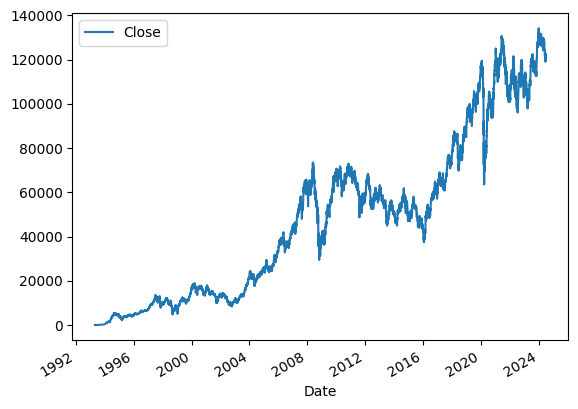

In [27]:
df_ibovespa.plot.line(y="Close", use_index=True)

In [28]:
del df_ibovespa["Dividends"]
del df_ibovespa["Stock Splits"]

df_ibovespa["Tomorrow"] = df_ibovespa["Close"].shift(-1)

df_ibovespa["Goal"] = (df_ibovespa["Tomorrow"] > df_ibovespa["Close"]).astype(int)
df_ibovespa

,Open,High,Low,Close,Volume,Tomorrow,Goal
Date,,,,,,,
1993-04-27 00:00:00-03:00,24.799999,25.400000,24.500000,24.500000,0,24.299999,0
1993-04-28 00:00:00-03:00,24.500000,24.600000,23.700001,24.299999,0,23.700001,0
1993-04-29 00:00:00-03:00,24.299999,24.799999,23.700001,23.700001,0,24.100000,1
1993-04-30 00:00:00-03:00,23.700001,24.200001,23.700001,24.100000,0,24.100000,0
1993-05-03 00:00:00-03:00,24.100000,24.400000,23.799999,24.100000,0,24.900000,1
...,...,...,...,...,...,...,...
2024-06-19 00:00:00-03:00,119630.000000,120383.000000,118960.000000,120261.000000,5646300,120446.000000,1
2024-06-20 00:00:00-03:00,120267.000000,121607.000000,120156.000000,120446.000000,8659500,121341.000000,1
2024-06-21 00:00:00-03:00,120446.000000,121580.000000,120061.000000,121341.000000,12906900,122637.000000,1


In [29]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = df_ibovespa.iloc[:-100]
test = df_ibovespa.iloc[-100:]

predictors = ["Open", "High", "Low", "Close", "Volume"]
model.fit(train[predictors], train["Goal"])

predictions = model.predict(test[predictors])
predictions = pd.Series(predictions, index=test.index)  
predictions

Date
2024-01-31 00:00:00-03:00    1
2024-02-01 00:00:00-03:00    1
2024-02-02 00:00:00-03:00    1
2024-02-05 00:00:00-03:00    1
2024-02-06 00:00:00-03:00    1
                            ..
2024-06-19 00:00:00-03:00    0
2024-06-20 00:00:00-03:00    0
2024-06-21 00:00:00-03:00    0
2024-06-24 00:00:00-03:00    0
2024-06-25 00:00:00-03:00    0
Length: 100, dtype: int64

In [30]:
precision_model = precision_score(test["Goal"], predictions)
print("Precision: ", precision_model)
accuracy_model = accuracy_score(test["Goal"], predictions)
print("Accuracy: ", accuracy_model)

Precision:  0.4383561643835616
Accuracy:  0.46


In [36]:
# construindo um sistema de backtesting

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [45]:
def backtest(data, model, predictors, start=1, step=1):
    all_predictions = []

    for i in range(start,data.shape[0], step):
        train = data.iloc[0,i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [48]:
predictions = backtest(df_ibovespa, model, predictors)

IndexError: invalid index to scalar variable.

In [47]:
predictions.value_counts()

1    73
0    27
Name: count, dtype: int64

In [51]:
precision_score(predictions, predictions)

np.float64(1.0)